In [155]:
from ultralytics import YOLO
import pyautogui
import threading
import time
from PIL import Image

from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import copy

In [15]:
screen_width, screen_height = list(pyautogui.size())
model = YOLO("Models/best.pt")
model.to("cuda")
print("hi")

hi


In [159]:
time.sleep(2)

screenshot = pyautogui.screenshot()

screenshot_result = model(screenshot)  # return a list of Results objects
class_names = screenshot_result[0].names

detected_classes = list(map(int, screenshot_result[0].boxes.cls.tolist()))
detected_confidence = screenshot_result[0].boxes.conf.tolist()
detected_bbox = screenshot_result[0].boxes.xywh.tolist()


0: 384x640 1 bomb, 2 fruits, 19.0ms
Speed: 3.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


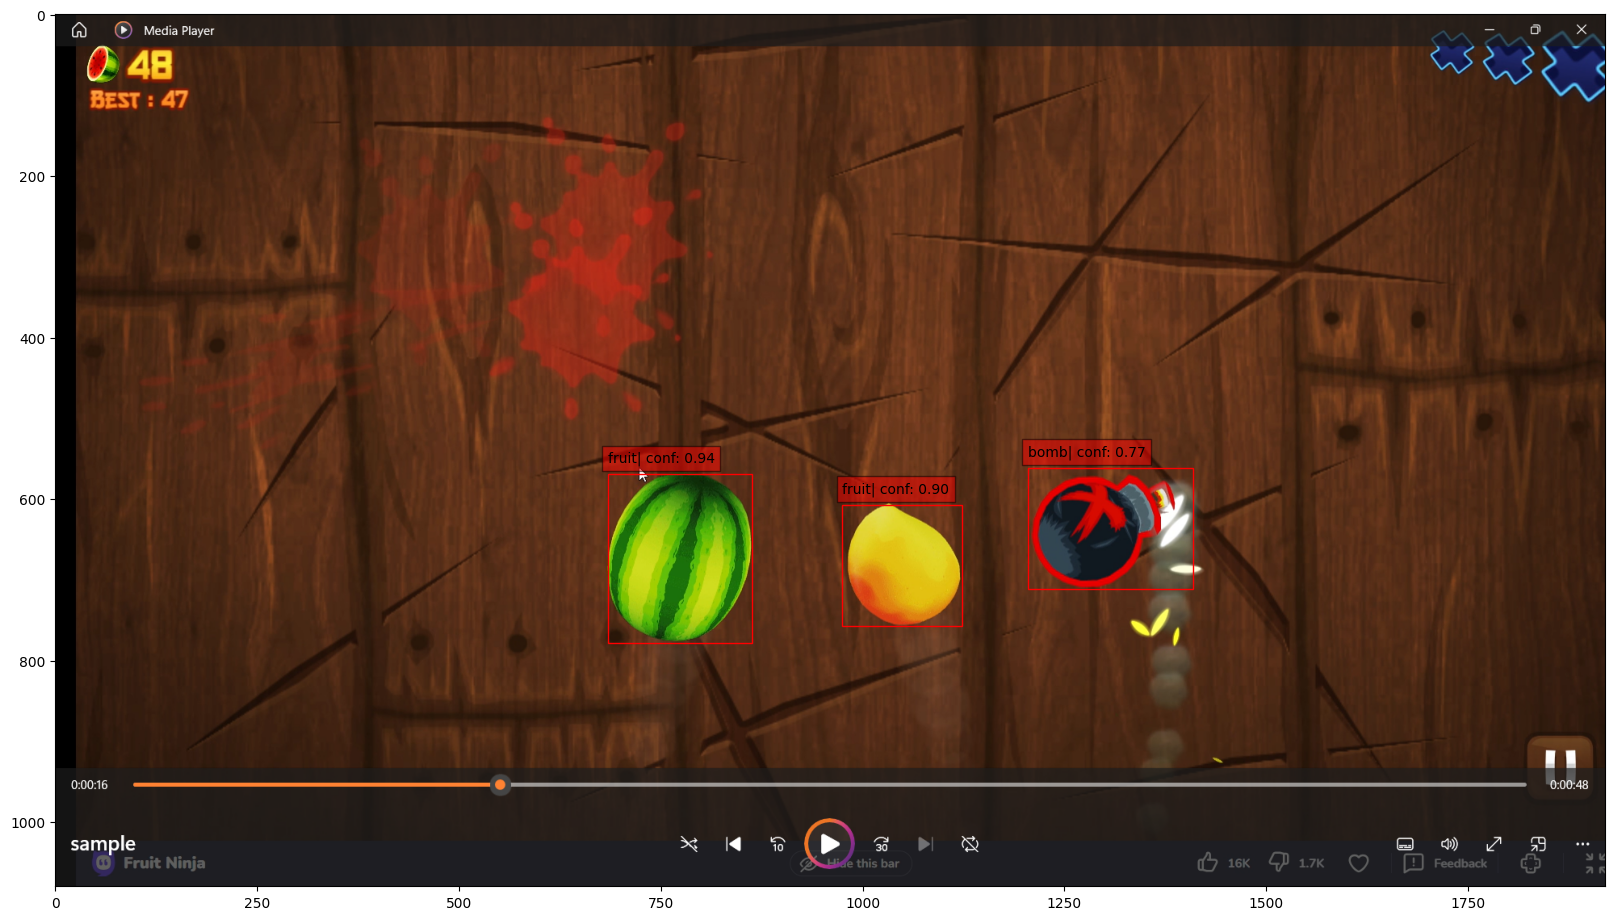

In [184]:
fig = plt.figure(figsize=(20,40 ))
ax = fig.add_subplot(1,1,1)


ax.imshow(screenshot)

temp=copy.deepcopy(detected_bbox)
for i in range(len(temp)):
    temp[i]+=[class_names[detected_classes[i]], detected_confidence[i]]
for x, y, w, h, i, j, in temp:
    rect = Rectangle((x-w/2,y-h/2), w, h, linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    ax.text(x-w/2,y-h/2-15, f'{i}| conf: {j:.2f}', bbox=dict(facecolor='red', alpha=0.5))

In [17]:
im = Image.fromarray(predicted[0].orig_img)

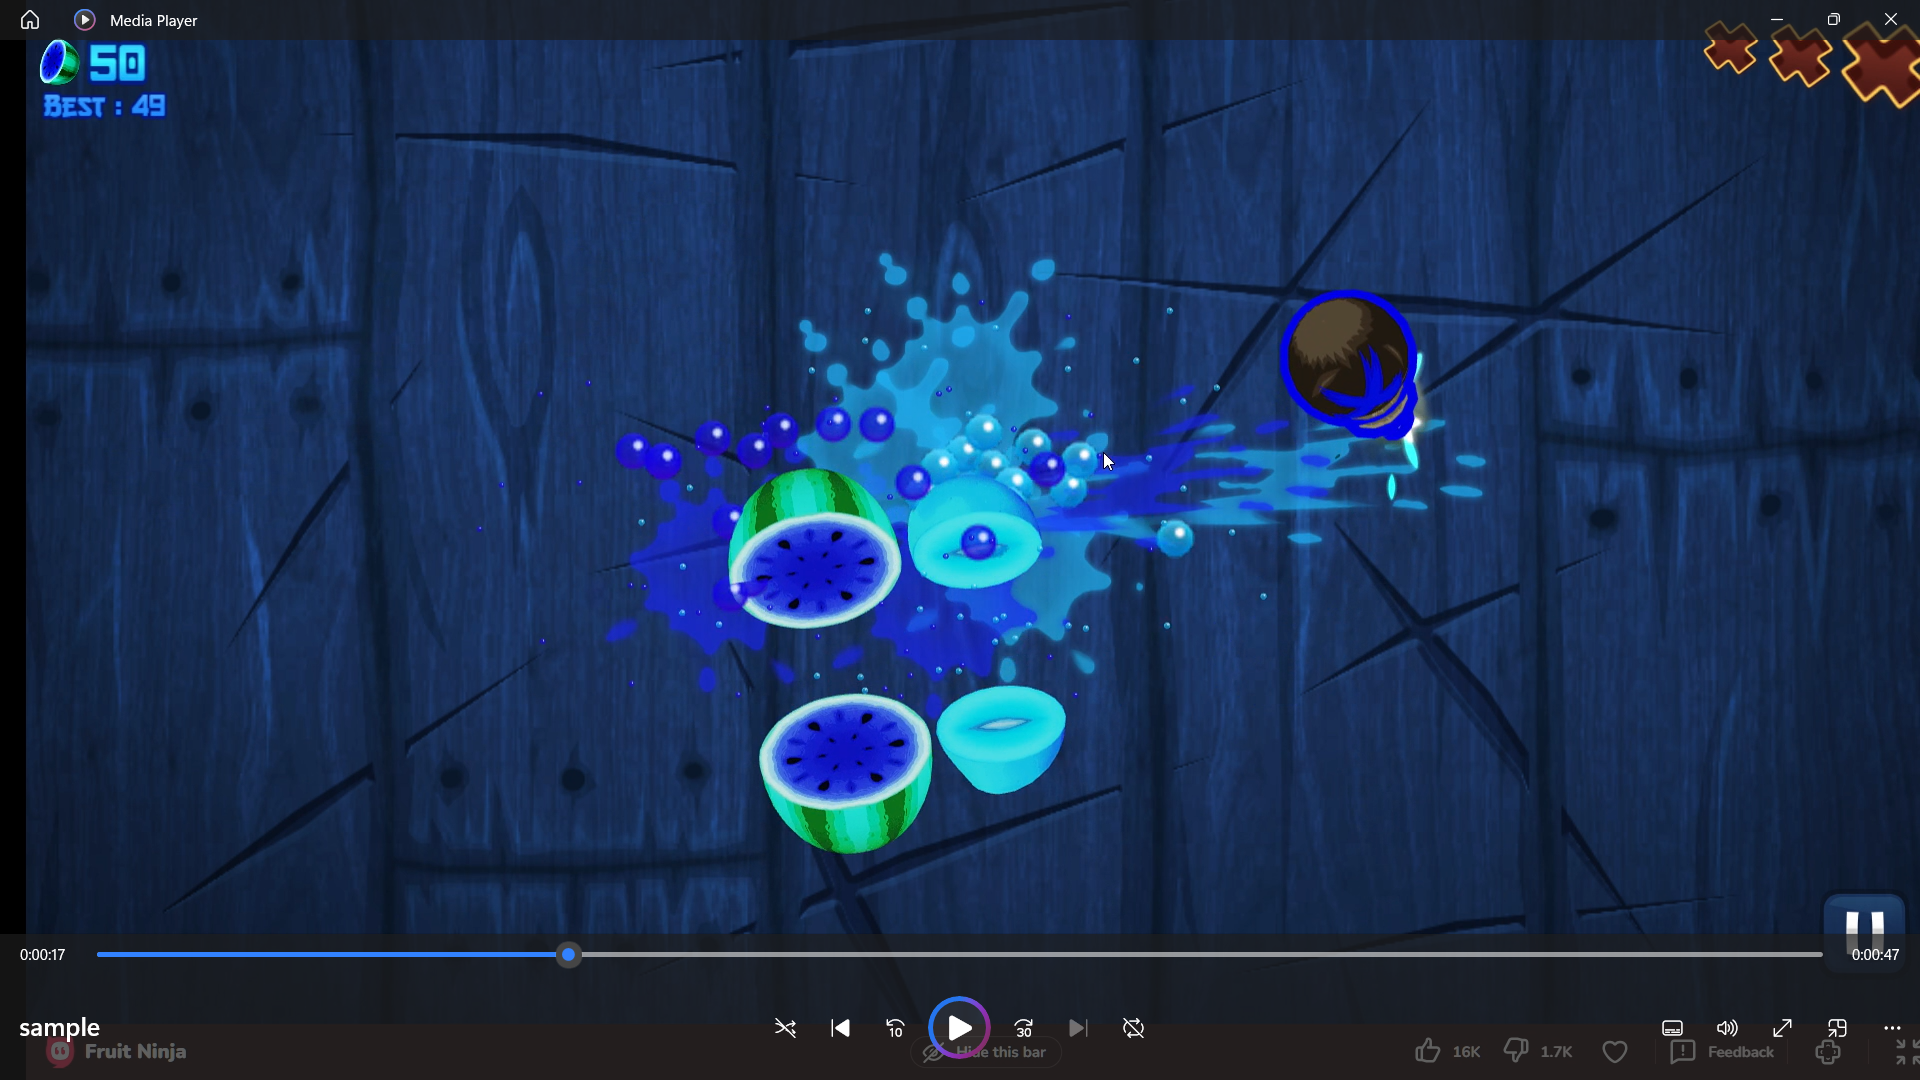

In [18]:
display(im)

In [ ]:
def record_screen(stop_event, model):
    pyautogui.FAILSAFE = False      # this basically removes your ability to move your mouse
    screen_width, screen_height = list(pyautogui.size())
    
    while not stop_event.is_set():
        screenshot = pyautogui.screenshot()
        

In [6]:
model = YOLO("Models/best.pt")
model.to("cuda")

stop_event = threading.Event()

# starts record your screen
record_thread = threading.Thread(group=None, target=None, name=None, args=, )